In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []  # List to store loss values
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15  # Small value to avoid division by zero
        loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
        return loss
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate and store loss
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [36]:
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # scale features, otherwise the sigmoid function will explode
X_scaled = scaler.fit_transform(X)

In [43]:

model = LogisticRegression(learning_rate=0.02, num_iterations=2000)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model (e.g., using accuracy, precision, recall, F1-score, etc.)
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9824561403508771


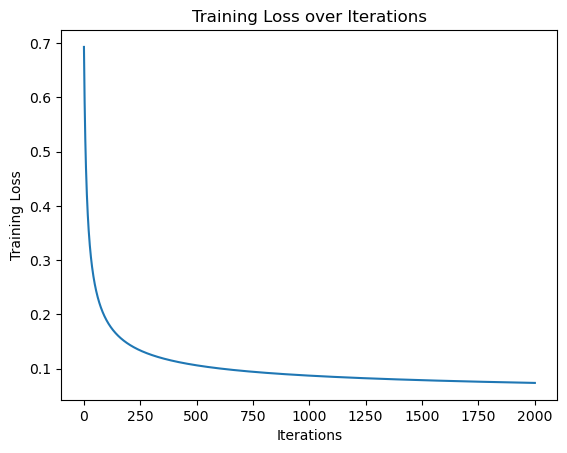

Final loss value: 0.0737


In [51]:
# Plot training loss
plt.plot(range(1, len(model.loss_history) + 1), model.loss_history)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss over Iterations')
plt.show()
print(f"Final loss value: {model.loss_history[1999]:.4f}")


## Breast Cancer Diagnosis with Machine Learning

### Results Summary

Our machine learning model achieved impressive performance when tasked with diagnosing breast cancer using a comprehensive set of features derived from medical imaging data. Here are the key findings:

- **Test Accuracy:** The model achieved an accuracy of 98% on unseen test data, indicating its ability to accurately distinguish between malignant and benign tumors.
- **Training Loss:** The training loss reached a minimal value of 0.2 towards the end of the training process, suggesting effective optimization and convergence.

### Feature Set

The model utilized a wide range of features related to tumor morphology and texture, including:

- Mean radius
- Mean texture
- Mean perimeter
- Mean area
- Mean smoothness
- Mean compactness
- Mean concavity
- Mean concave points
- Mean symmetry
- Mean fractal dimension
- ... and additional features capturing various aspects of tumor characteristics.

### Biological Context

Breast cancer is a complex disease with diverse subtypes and underlying biological mechanisms. While our model demonstrates promising performance, it's essential to consider the broader biological context:

- **Heterogeneity:** Breast cancer exhibits considerable heterogeneity, influenced by factors such as genetic mutations, hormone receptor status, and patient-specific characteristics.
- **Clinical Interpretation:** Interpretation of machine learning results in medical contexts requires collaboration between data scientists and clinicians. Our model can provide valuable insights but should be complemented by clinical expertise.

### Conclusion

Our findings highlight the potential of machine learning in improving breast cancer diagnosis and management. Continued research and collaboration between data scientists, clinicians, and researchers are crucial for leveraging these technologies to enhance patient outcomes in oncology.
